# 7-ParallelEfficiency
This notebook evaluates the scaling with respect to the number of cores.

Author: Peter W. Rose (pwrose@ucsd.edu)

In [1]:
import os
import time
import math
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import papermill as pm

If LOCAL_SCRATCH_DIR environment variable is not set, this notebook accesses the ../data directory for temporary files.

In [2]:
DATA_DIR = os.getenv("LOCAL_SCRATCH_DIR", default="../data")
filename = os.path.join(DATA_DIR, "gene_info.tsv")
print("Filename:", filename)

Filename: ../data/gene_info.tsv


In [3]:
RESULTS_DIR = "results"
os.makedirs(RESULTS_DIR, exist_ok=True)

### Specify Number of Cores for Benchmark

In [4]:
n_cores = 4

In [5]:
n = round(math.log(n_cores, 2))
cores = [2**i for i in range(n+1)]
print(cores)

[1, 2, 4]


### Run Benchmark
Results are saved in the results directory.

In [6]:
timing = []
for n_cores in cores:
    start = time.time()
    
    pm.execute_notebook("4-SparkDataframe.ipynb", f"results/4-SparkDataframe_{n_cores}.ipynb", parameters={"n_cores": n_cores})
       
    end = time.time()
    print(f"Cores: {n_cores}, {end-start} s")
    timing.append({"cores": n_cores, "time": end-start})

/Users/Peter/miniconda3/envs/df-parallel/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Executing:   5%|█▍                             | 1/22 [00:01<00:31,  1.50s/cell]Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
Executing: 100%|██████████████████████████████| 22/22 [01:43<00:00,  4.72s/cell]


Cores: 1, 104.0259621143341 s


Executing:   5%|█▍                             | 1/22 [00:01<00:39,  1.87s/cell]Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
Executing: 100%|██████████████████████████████| 22/22 [01:12<00:00,  3.31s/cell]


Cores: 2, 72.9477288722992 s


Executing:   5%|█▍                             | 1/22 [00:01<00:38,  1.84s/cell]Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
Executing: 100%|██████████████████████████████| 22/22 [00:55<00:00,  2.51s/cell]

Cores: 4, 55.17423176765442 s


In [7]:
df = pd.DataFrame(timing)

In [8]:
df["efficiency"] = df["time"].iloc[0] / (df["time"] * df["cores"])

In [9]:
df

,cores,time,efficiency
0,1,104.025962,1.000000
1,2,72.947729,0.713017
2,4,55.174232,0.471352


### Plot Runtime as Function of Cores

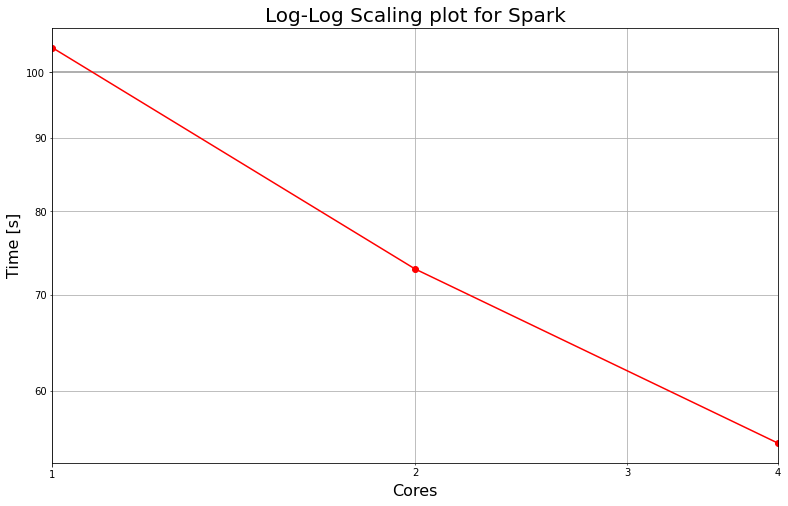

In [14]:
fig, ax = plt.subplots(figsize=(13, 8))
ax.loglog()
for axis in [ax.xaxis, ax.yaxis]:
    formatter = matplotlib.ticker.FormatStrFormatter("%d")
    axis.set_major_formatter(formatter)
    axis.set_minor_formatter(formatter)
ax.grid(visible=True, which='major', linewidth=2)
ax.grid(visible=True, which='minor')
plt.title("Log-Log Scaling plot for Spark", fontsize=20)
plt.xlabel("Cores", fontsize=16)
plt.ylabel("Time [s]", fontsize=16)
plt.xlim([1, n_cores])
plt.plot(df["cores"].values, df["time"].values, 'ro-')

plt.savefig(os.path.join("results", "Spark_scaling.png"), dpi=300)
plt.show()

### Plot Parallel Efficiency as Function of Cores

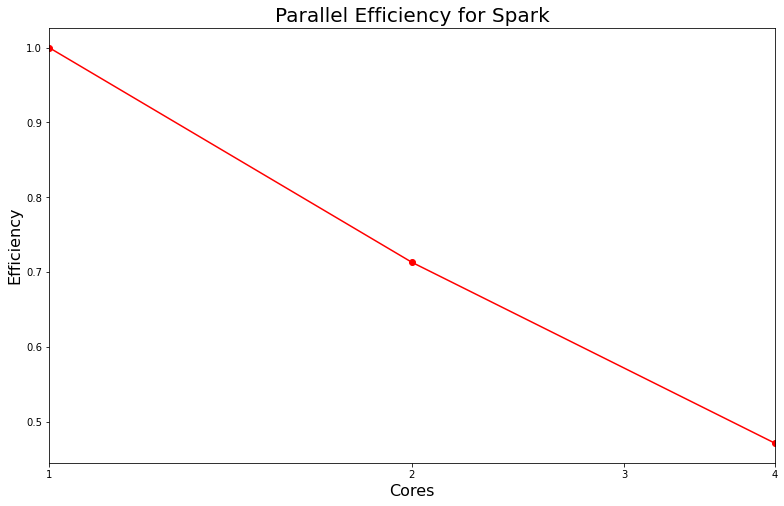

In [13]:
fig, ax = plt.subplots(figsize=(13, 8))
ax.set_xscale('log')
formatter = matplotlib.ticker.FormatStrFormatter("%d")
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_minor_formatter(formatter)
ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
                                                         
plt.title("Parallel Efficiency for Spark", fontsize=20)
plt.xlabel("Cores", fontsize=16)
plt.ylabel("Efficiency", fontsize=16)
plt.xlim([1, n_cores])
plt.plot(df["cores"].values, df["efficiency"].values, 'ro-')

plt.savefig(os.path.join("results", "Spark_efficiency.png"), dpi=300)
plt.show()